In [15]:
import pandas as pd 

#load dataset 
df = pd.read_csv("C:\\Users\\kim24\\car_price_prediction\\Data\\car details v4 (2).csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [17]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [18]:
#cleaning data 

df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [19]:
df.shape


(2059, 20)

In [20]:
(df.isnull().mean() * 100).sort_values(ascending=False)


Drivetrain            6.605148
Fuel Tank Capacity    5.488101
Max Torque            3.885381
Engine                3.885381
Max Power             3.885381
Height                3.108305
Width                 3.108305
Length                3.108305
Seating Capacity      3.108305
Price                 0.000000
Model                 0.000000
Make                  0.000000
Year                  0.000000
Seller Type           0.000000
Color                 0.000000
Owner                 0.000000
Fuel Type             0.000000
Transmission          0.000000
Kilometer             0.000000
Location              0.000000
dtype: float64

In [22]:
df.duplicated().sum() 

np.int64(0)

In [26]:
# coverted columns 

df["max_power"] = (
    df["Max Power"]
    .str.extract(r"(\d+\.?\d*)")   # extract numeric part
    .astype(float)
)

In [27]:
df.dropna(subset=["max_power"], inplace=True)

In [28]:
df["max_power"].head(10)

dtype('float64')

In [29]:
df["max_power"].head(10)

0     87.0
1     74.0
2     79.0
3     82.0
4    148.0
5     91.0
6    181.0
7    188.0
8    177.0
9     84.0
Name: max_power, dtype: float64

In [ ]:
# --- Clean fuel tank capacity ---
df["Fuel Tank Capacity"] = (
    df["Fuel Tank Capacity"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")
    .astype(float)
) 

In [45]:
df["Fuel Tank Capacity"].head(10)

0     35.0
1     42.0
2     35.0
3     37.0
4     55.0
5     43.0
7     51.0
8     50.0
9     50.0
10    45.0
Name: Fuel Tank Capacity, dtype: float64

In [ ]:
df["engine_cc"] = (
    df["Engine"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")
    .astype(float)
)

In [48]:
df["engine_cc"].head(10)

0     1198.0
1     1248.0
2     1197.0
3     1197.0
4     2393.0
5     1373.0
7     1995.0
8     1798.0
9     1461.0
10    1197.0
Name: engine_cc, dtype: float64

In [ ]:
df["max_torque"] = (
    df["Max Torque"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")
    .astype(float)
)

In [52]:
df["max_torque"].head(10)

0     109.0000
1     190.0000
2     112.7619
3     113.0000
4     343.0000
5     130.0000
7     400.0000
8     250.0000
9     200.0000
10    115.0000
Name: max_torque, dtype: float64

In [54]:
df = df.copy()  # safe guard

df.loc[:, "Make"] = df["Make"].str.strip().str.title()
df.loc[:, "Model"] = df["Model"].str.strip().str.title()
df.loc[:, "Color"] = df["Color"].str.strip().str.title()
df.loc[:, "Fuel Type"] = df["Fuel Type"].str.strip().str.title()
df.loc[:, "Transmission"] = df["Transmission"].str.strip().str.title()
df.loc[:, "Owner"] = df["Owner"].str.strip().str.title()


In [56]:
columns_to_drop = [
    "Max Power",
    "Max Torque",
    "Fuel Tank Capacity",
    "Engine",
    "Drivetrain",
    "Location"
]


In [57]:
df = df.copy()  # safety

df.drop(columns=columns_to_drop, inplace=True)

In [91]:
INR_TO_USD = 83
LAKH = 100_000

df["Price"] = (df["Price"] * LAKH / INR_TO_USD).round(2)

In [92]:
df[["Make", "Model", "Year", "Price"]].sort_values("Price", ascending=False).head(10)


,Make,Model,Year,Price
483,Ferrari,488 Gtb,2018,6121156.63
1305,Land Rover,Range Rover 3.0 V6 Diesel Vogue Lwb,2020,4809481.93
582,Land Rover,Range Rover 3.0 V6 Diesel Vogue,2019,3847590.36
1246,Rolls-Royce,Ghost Extended Wheelbase,2011,3497807.23
1369,Rolls-Royce,Ghost Extended Wheelbase,2012,3497807.23
1890,Mercedes-Benz,S-Class S 450,2021,3497807.23
1313,Land Rover,Range Rover 3.0 V6 Diesel Vogue,2019,3375385.54
442,Mercedes-Benz,S-Class Maybach S 560,2021,3235469.88
1912,Mercedes-Benz,S-Class S 350D [2018-2020],2021,3235469.88
977,Rolls-Royce,Ghost 6.5,2011,3148024.10


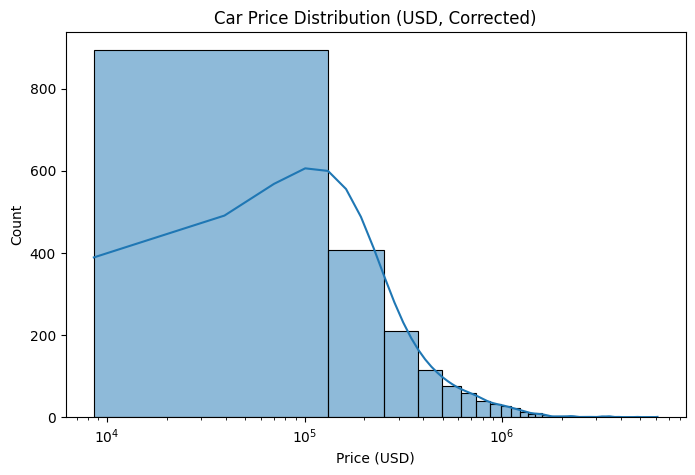

In [93]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.xscale("log")
plt.title("Car Price Distribution (USD, Corrected)")
plt.xlabel("Price (USD)")
plt.show()


In [94]:
final_features = [
    "Make",
    "Model",
    "Year",
    "Kilometer",
    "Fuel Type",
    "Transmission",
    "Owner",
    "Seller Type",
    "Color",
    "engine_cc",
    "max_power",
    "max_torque",
    "Fuel_Tank_Capacity",
    "Length",
    "Width",
    "Height",
    "Seating Capacity",
    "Price"
]

df_final = df[final_features].copy()


In [95]:
f_encoded = pd.get_dummies(
    df_final,
    columns=[
        "Make",
        "Model",
        "Fuel Type",
        "Transmission",
        "Owner",
        "Seller Type",
        "Color"
    ],
    drop_first=True
)

In [96]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1937 entries, 0 to 2057
Columns: 1051 entries, Year to Color_Yellow
dtypes: bool(1040), float64(8), int64(3)
memory usage: 2.1 MB


In [98]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [99]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=22,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",22
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [100]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = final_model.predict(X_test)

print("FINAL R² Score:", r2_score(y_test, y_pred))
print("FINAL MAE (USD):", mean_absolute_error(y_test, y_pred))


FINAL R² Score: 0.9358393293514123
FINAL MAE (USD): 251711.87114219068


In [102]:
df["Price"].describe()

count    1.937000e+03
mean     2.936501e+05
std      4.195547e+05
min      8.566270e+03
25%      8.481928e+04
50%      1.434096e+05
75%      3.235422e+05
max      6.121157e+06
Name: Price, dtype: float64

In [103]:
import joblib 

joblib.dump(final_model, "car_price_model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

In [104]:
import numpy as np
import pandas as pd

cols = joblib.load("model_columns.pkl")

test_input = pd.DataFrame(
    np.zeros((1, len(cols))),
    columns=cols
)

# set some realistic values
test_input["Year"] = 2020
test_input["Kilometer"] = 40000
test_input["engine_cc"] = 2000
test_input["max_power"] = 180
test_input["Fuel_Tank_Capacity"] = 55

final_model.predict(test_input)


array([2614943.93380404])

In [105]:
st.success(f"Estimated Price: ${price:,.0f} USD")
st.caption("Prices are estimated using Indian market data (converted from INR lakhs).")

NameError: name 'st' is not defined